# СТОИМОСТЬ ПОДЕРЖАННЫХ АВТОМОБИЛЕЙ.

# Краткое описание проекта. 

Многие знают о маркетплейсах, где продаются б/у вещи, в которых есть возможность недорого купить качественную и полезную вещь. Но всегда волнует вопрос - кто и как устанавливает цену, и какие его характеристики больше всего влияют на общую стоимость продажи?! Вопрос становится особенно актуальным, если речь идет о дорогих товарах, например об автомобилях!

# Цель проекта.

Разработать модель предсказания стоимости автомобиля на вторичном рынке.

# Описание данных.

- Year - Год выпуска автомобиля.
- Make - Марка автомобиля.
- Model - Модель автомобиля.
- Trim - Модификация автомобиля.
- Body - Тип кузова транспортного средства относится к форме и модели конкретной марки автомобиля.
- Transmission - механизм, который передает мощность от двигателя к колесам.
- VIN - идентификационный номер транспортного средства.
- State - штат, в котором автомобиль выставлен на аукцион.
- Condition - Состояние автомобилей на момент аукциона.
- Odometer - пробег автомобиля с момента выпуска.
- Color - Цвет кузова автомобиля.
- Interior - Цвет салона автомобиля.
- Seller - Продавец автомобиля, автосалоны.
- MMR - Рекорд рынка Manhiem, рыночная оценочная цена автомобилей.
- Sellingprice - цена, по которой автомобиль был продан на аукционе(целевой признак).
- Saledate - Дата продажи автомобиля.

# План работы.
**1. EDA (Первичное исследование и изучение данных).**

**2. Предобработка данных:**
- Разработка новых синтетических признаков.
- Работа с пропусками.
- Работа с дубликатами.
- Предобработка каждого признака.
 
**3.Подготовка к обучению модели:**
- Корреляция признаков.
- Разделение на выборки и кодирование.

**4.Обучение модели:**
- Решающее дерево
- Catboost

**5.Определение важности признаков.**

**6.Обработка тестовых данных:**
- Знакомство с данными.
- Добавление новых синтетических  и удаление неинформативных признаков.
- Работа с пропусками.
- Кодирование.
- Получение предсказаний.

**7.Отчёт.**

##  EDA (Первичное исследование и изучение данных).

**Загрузим все необходимые для работы библиотеки и модули.**

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from vininfo import Vin
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
import missingno as mi
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

**Считаем данные из csv-файлов в датафреймы и сохраним в переменные с одноименными названиями.**

In [3]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

display(data_train.shape)
display(data_test.shape)

(440236, 15)

(110058, 14)

**Для начала напишем функцию, которая на вход будет принимать датафрейм, а возвращать будет всю основную о нём информацию(несколько строк, краткую статистическую сводку для данных, типы данных и количество строк, а так же количество пропусков в каждом столбце).**

In [4]:
def opening(data):
    display(data.head())
    display(data.info())
    display(data.describe())
    display(data.isna().sum())

In [5]:
opening(data_train)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          432193 non-null  object 
 2   model         432113 non-null  object 
 3   trim          431899 non-null  object 
 4   body          429843 non-null  object 
 5   transmission  388775 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     430831 non-null  float64
 9   odometer      440167 non-null  float64
 10  color         439650 non-null  object 
 11  interior      439650 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
 14  saledate      440236 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 50.4+ MB


None

,year,condition,odometer,sellingprice
count,440236.000000,430831.000000,440167.000000,440236.000000
mean,2010.040101,3.425077,68344.421604,13592.209588
std,3.977945,0.949973,53542.203908,9751.479098
min,1982.000000,1.000000,1.000000,1.000000
25%,2007.000000,2.700000,28258.000000,6900.000000
50%,2012.000000,3.600000,52098.000000,12100.000000
75%,2013.000000,4.200000,99272.000000,18200.000000
max,2015.000000,5.000000,999999.000000,230000.000000


year                0
make             8043
model            8123
trim             8337
body            10393
transmission    51461
vin                 0
state               0
condition        9405
odometer           69
color             586
interior          586
seller              0
sellingprice        0
saledate            0
dtype: int64

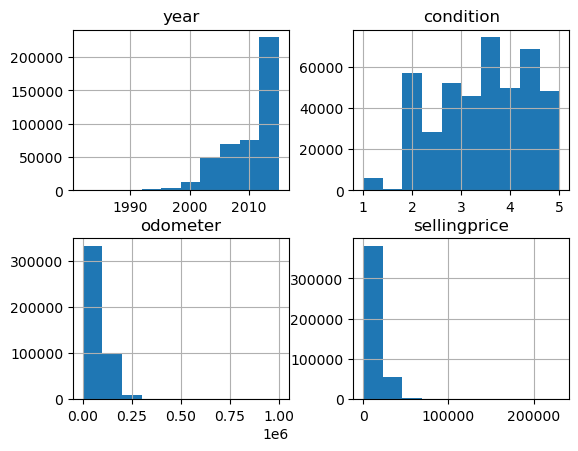

In [6]:
data_train.hist();

**Выводы по разделу:**
- Размеры выборок 440236 строк, 15 столбцов-тренировочна; 110058 строк, 14 столбцов-тестовая. Соотношение тренировочной к тестовой 75%:25%
- В тренировочной выборке пропуски обнаружены в девяти признаках: make,model,trim,body,transmission,condition,odometer,color,interior.

## Предобработка данных.

### Разработка новых синтетических признаков.

**При помощи библиотеки Vin осуществим парсинг новых признаков. У нас в таблице есть признак с ВИНом автомобиля. Из данного обозначения можно вытащить информацию о стране производства и части света. Создадим два новых признака country и region.**

In [7]:
for i, vin_code in enumerate(data_train['vin']):
    vin = Vin(vin_code)
    data_train.loc[i, 'country'] = vin.country
    data_train.loc[i,'region'] = vin.region

**Удалим неинформативные признаки, которые не пригодятся для дальнейшего обучения модели. Признак vin нам уже не потребуется, так как всю нужную информацию мы из него извлекли.** 

In [8]:
data_train = data_train.drop(columns=['saledate','seller','state','transmission','color','interior','vin'],axis=1)

### Работа с пропусками.

**При помощи библиотеки missingno визуализируем пропуски значений в столбцах тренировочной выборки.**

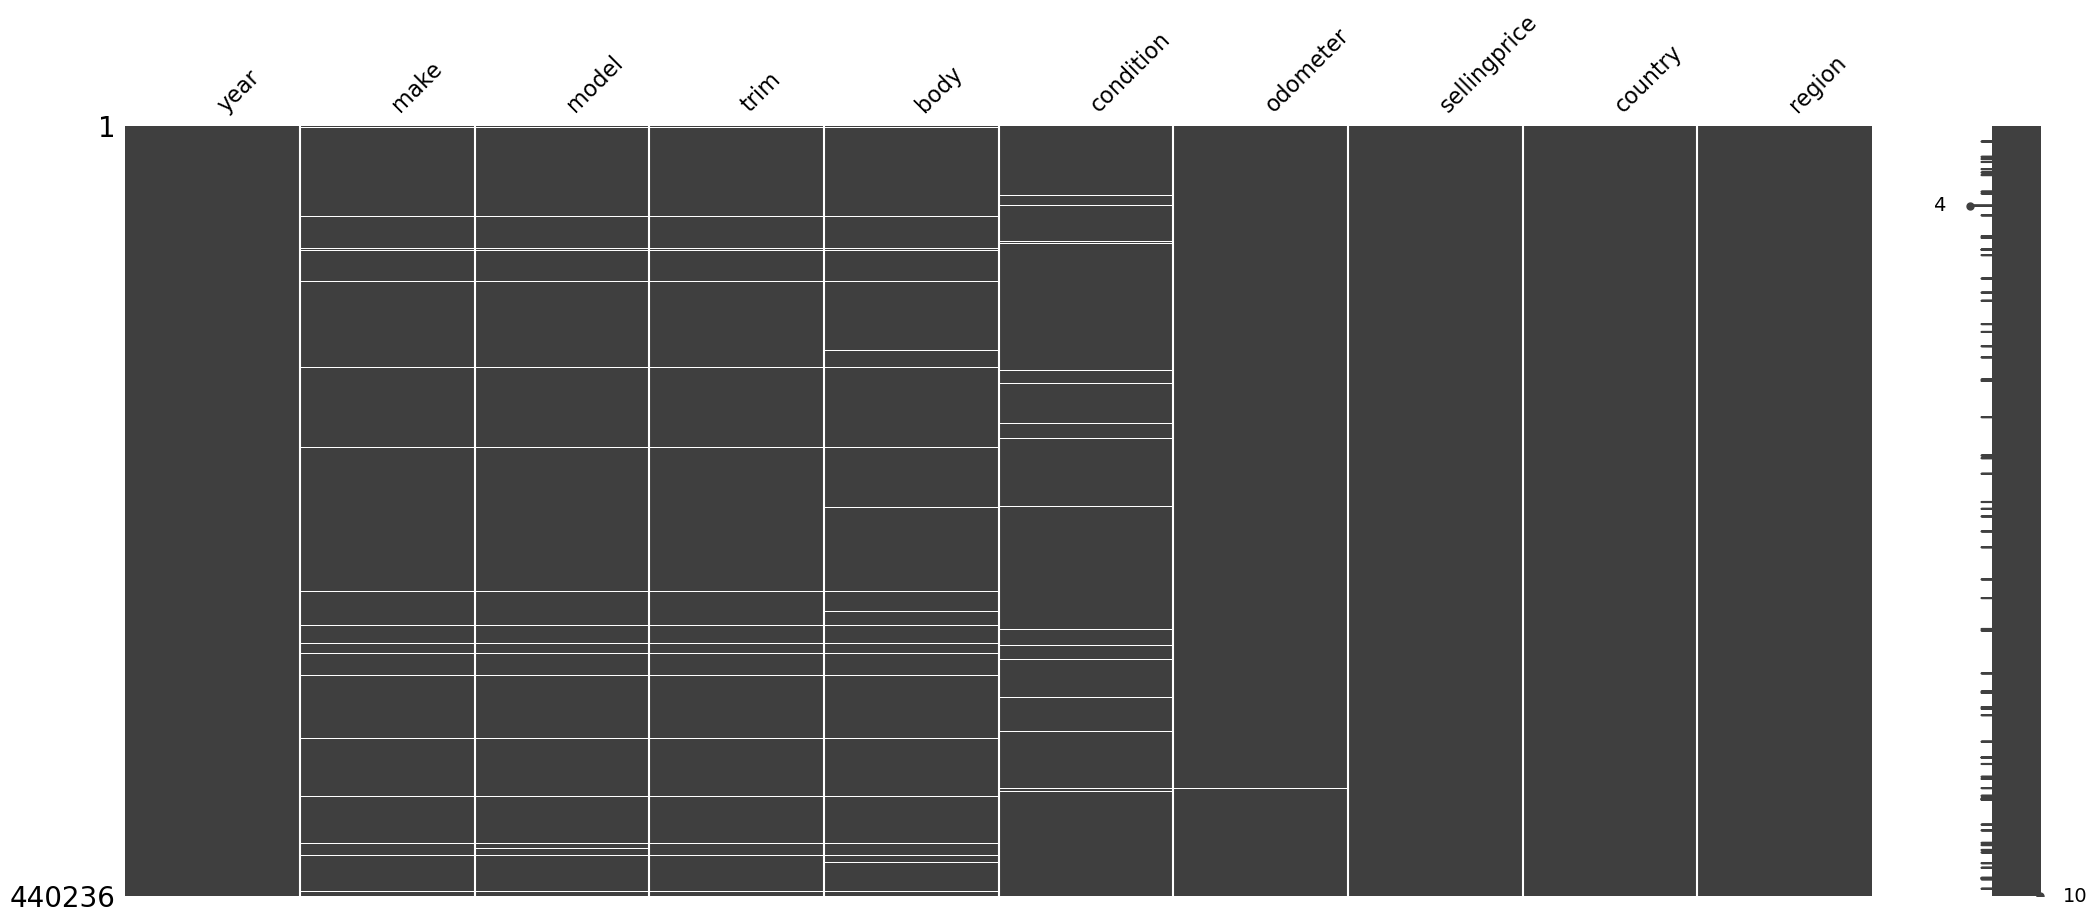

In [9]:
mi.matrix(data_train);

**И посмотрим на пропуски в числовом выражении.**

In [10]:
data_train.isna().sum()

year                0
make             8043
model            8123
trim             8337
body            10393
condition        9405
odometer           69
sellingprice        0
country             0
region              0
dtype: int64

**На графике чётко проглядывается тот факт, что пропуски в столбцах make(бренд авто), model(модель), trim(комплектация) и body(тип кузова) имеют пропуски в одних и тех же наблюдениях. Удалим пропуски в том,у которого в числовом выражении больше всех пропусков, в нашем случае это столбец body. Так же удалим пропуски в столбцах condition(состояние авто) и odometer(пробег авто на момент продажи). Количество строк с пропусками в данных столбцах составляет чуть больше 2,2%. Данным количеством можно пожертвовать для сохранения "реальности" данных.**

In [11]:
data_train = data_train.dropna (subset=['body','condition','odometer'])

**Проверим наличие пропусков после удаления.**

In [12]:
data_train.isnull().sum()

year             0
make             0
model           80
trim             0
body             0
condition        0
odometer         0
sellingprice     0
country          0
region           0
dtype: int64

**Пропуски в столбце model(модель автомобиля) мы заменим модой по другому столбцу-make(марка автомобиля). Напишем цикл, который по определенной марке будет искать наиболее частую модель и подставлять это значение на место пропуска.**

In [13]:
for b in data_train.loc[data_train['model'].isna(),'make'].unique():
        data_train.loc[data_train['model'].isna(),'model'] = data_train.loc[data_train['make']==b,'model'].mode()[0]

In [14]:
data_train.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
condition       0
odometer        0
sellingprice    0
country         0
region          0
dtype: int64

### Работа с дубликатами.

In [15]:
data_train.duplicated().sum()

7

In [16]:
data_train = data_train.drop_duplicates()

In [17]:
data_train.duplicated().sum()

0

**Сбросим индексы после всех преобразований и выведем всю информацию по тренировочной выборке.**

In [18]:
data_train.reset_index(drop=True, inplace=True)
opening(data_train)

,year,make,model,trim,body,condition,odometer,sellingprice,country,region
0,2011,Ford,Edge,SEL,suv,4.2,111041.0,12500,Canada,North America
1,2014,Ford,Fusion,SE,Sedan,3.5,31034.0,14500,Mexico,North America
2,2012,Nissan,Sentra,2.0 SL,sedan,2.2,35619.0,9100,Mexico,North America
3,2003,HUMMER,H2,Base,suv,2.8,131301.0,13300,United States,North America
4,2007,Ford,Fusion,SEL,Sedan,2.0,127709.0,1300,Mexico,North America


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420892 entries, 0 to 420891
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          420892 non-null  int64  
 1   make          420892 non-null  object 
 2   model         420892 non-null  object 
 3   trim          420892 non-null  object 
 4   body          420892 non-null  object 
 5   condition     420892 non-null  float64
 6   odometer      420892 non-null  float64
 7   sellingprice  420892 non-null  int64  
 8   country       420892 non-null  object 
 9   region        420892 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 32.1+ MB


None

,year,condition,odometer,sellingprice
count,420892.000000,420892.000000,420892.000000,420892.000000
mean,2010.237845,3.437066,66225.430702,13863.759979
std,3.836817,0.946189,52252.721836,9722.091071
min,1990.000000,1.000000,1.000000,1.000000
25%,2008.000000,2.700000,27583.000000,7300.000000
50%,2012.000000,3.600000,49931.000000,12400.000000
75%,2013.000000,4.200000,95884.000000,18400.000000
max,2015.000000,5.000000,999999.000000,230000.000000


year            0
make            0
model           0
trim            0
body            0
condition       0
odometer        0
sellingprice    0
country         0
region          0
dtype: int64

### Предобработка по каждому признаку.

#### Год (year).

**Посмотрим уникальные значения в столбце.**

In [19]:
data_train['year'].sort_values().unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015], dtype=int64)

**Взглянем на распределение значений.**

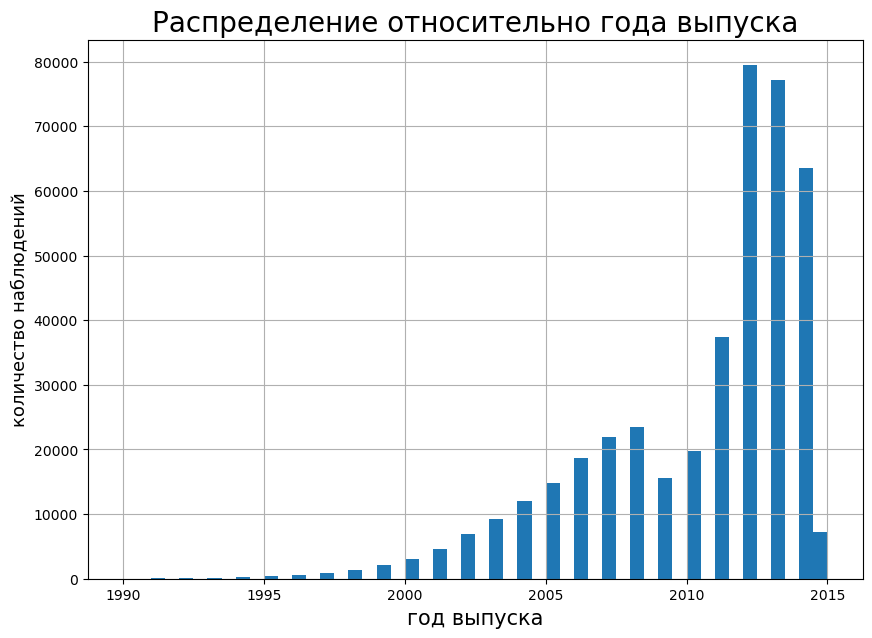

In [20]:
data_train['year'].hist(bins=50,figsize=(10,7))
plt.title("Распределение относительно года выпуска",fontsize=20)
plt.xlabel('год выпуска',fontsize=15)
plt.ylabel('количество наблюдений',fontsize=13);

**Посмотрим какое количество автомобилей соответсвует каждому году выпуска, представленному в датафрейме.**

In [21]:
data_train['year'].value_counts()

2012    79414
2013    77218
2014    63473
2011    37376
2008    23438
2007    21925
2010    19794
2006    18711
2009    15509
2005    14790
2004    12025
2003     9276
2015     7274
2002     6979
2001     4668
2000     3116
1999     2055
1998     1370
1997      940
1996      525
1995      461
1994      265
1993      126
1992       86
1991       47
1990       31
Name: year, dtype: int64

**Выводы по разделу:**
- аномалий и выбросов не обнаружено
- самый возрастной автомобиль 1990 года выпуска, самый молодой-2015
- больше всего на рынке представлено автомобилей 2012 года выпуска-79414 шт, меньше всего 1990-31 шт.

#### Марка (make).

**Посмотрим уникальные значения в столбце.**

In [22]:
data_train['make'].nunique()

52

**Приведем к верхнему регистру.**

In [23]:
data_train['make'] = data_train['make'].str.upper()

**Выведем список всех марок авто.**

In [24]:
data_train['make'].sort_values().unique()

array(['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DAEWOO', 'DODGE', 'FERRARI',
       'FIAT', 'FISKER', 'FORD', 'GEO', 'GMC', 'HONDA', 'HUMMER',
       'HYUNDAI', 'INFINITI', 'ISUZU', 'JAGUAR', 'JEEP', 'KIA',
       'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MERCURY', 'MINI', 'MITSUBISHI',
       'NISSAN', 'OLDSMOBILE', 'PLYMOUTH', 'PONTIAC', 'PORSCHE', 'RAM',
       'ROLLS-ROYCE', 'SAAB', 'SATURN', 'SCION', 'SMART', 'SUBARU',
       'SUZUKI', 'TESLA', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

**В столбце есть неявные дубликаты, такие как dodge и dodge tk и ram, ford и ford truck, gmc и gmc truck, land rover и landrover, mazda и mazda tk, mercedes и mercedes-b и mercedes-benz, volkswagen и vw. Уберем неявные дубликаты.**

In [25]:
data_train['make'] = data_train['make'].str.replace('DODGE TK','DODGE')
data_train['make'] = data_train['make'].str.replace('RAM','DODGE')
data_train['make'] = data_train['make'].str.replace('FORD TRUCK', 'FORD')
data_train['make'] = data_train['make'].str.replace('LANDROVER', 'LAND ROVER')
data_train['make'] = data_train['make'].str.replace('MERCEDES-BENZ','MERCEDES')
data_train['make'] = data_train['make'].str.replace('MERCEDES-B', 'MERCEDES')
data_train['make'] = data_train['make'].str.replace('GMC TRUCK', 'GMC')
data_train['make'] = data_train['make'].str.replace('MAZDA TK', 'MAZDA')
data_train['make'] = data_train['make'].str.replace('VW', 'VOLKSWAGEN')

**Посмотрим на исправленные значения.**

In [26]:
data_train['make'].sort_values().unique()

array(['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DAEWOO', 'DODGE', 'FERRARI',
       'FIAT', 'FISKER', 'FORD', 'GEO', 'GMC', 'HONDA', 'HUMMER',
       'HYUNDAI', 'INFINITI', 'ISUZU', 'JAGUAR', 'JEEP', 'KIA',
       'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES', 'MERCURY', 'MINI', 'MITSUBISHI', 'NISSAN',
       'OLDSMOBILE', 'PLYMOUTH', 'PONTIAC', 'PORSCHE', 'ROLLS-ROYCE',
       'SAAB', 'SATURN', 'SCION', 'SMART', 'SUBARU', 'SUZUKI', 'TESLA',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

**Визуализируем лидеров продаж за весь период.**

In [27]:
top_make = data_train.pivot_table(
    index='make', 
    values='sellingprice', 
    aggfunc='count'
).sort_values(by='sellingprice', ascending = False).head()
top_make.columns=['count']
top_make

,count
make,
FORD,72549
CHEVROLET,46405
NISSAN,42187
TOYOTA,30944
DODGE,27188


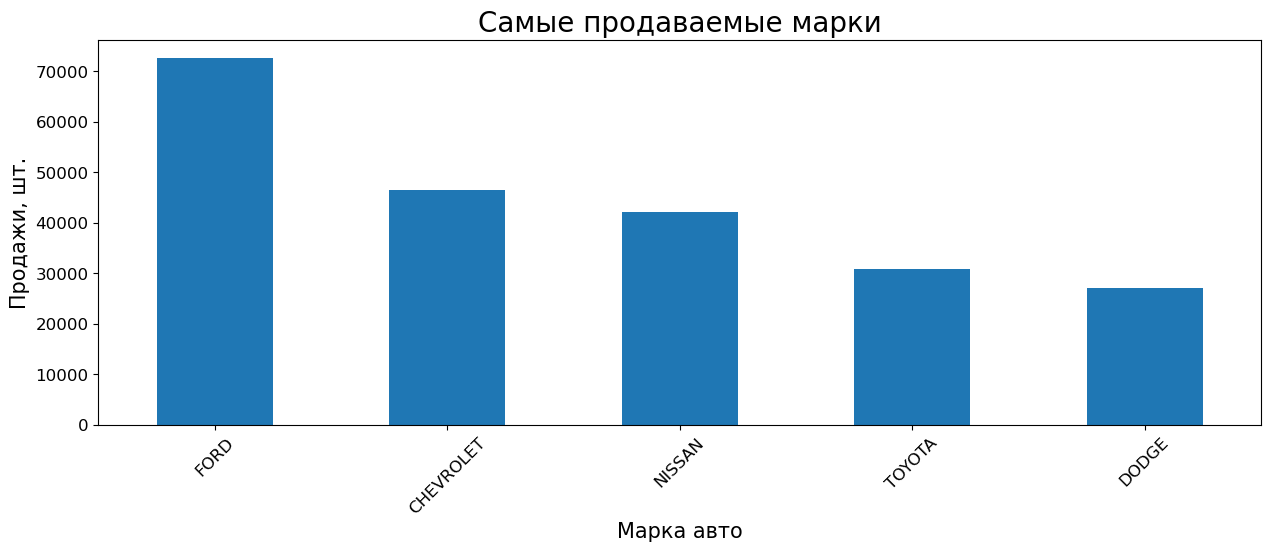

In [28]:
top_make.plot(kind='bar', figsize=(15,5),fontsize=12, legend=False)
plt.title("Самые продаваемые марки",fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Марка авто',fontsize=15)
plt.ylabel('Продажи, шт.',fontsize=15);

**Выводы по разделу:**
- для удобства привели все названия к верхнему регистру
- избавились от неявных дубликатов
- определили пятерку лучших марок по продажам. Ими оказались Ford, Chevrolet, Nissan, Toyota, Dodge

#### Модель (model).

**Посмотрим уникальные значения в столбце.**

In [29]:
data_train['model'].sort_values().unique()

array(['1 Series', '1500', '190-Class', '2 Series', '200', '200SX',
       '2500', '3', '3 Series', '3 Series Gran Turismo', '300',
       '300-Class', '3000GT', '300M', '300ZX', '3500', '350Z', '370Z',
       '4 Series', '4 Series Gran Coupe', '400-Class', '420-Class',
       '458 Italia', '4Runner', '5 Series', '5 Series Gran Turismo',
       '500', '500-Class', '500L', '500e', '6', '6 Series',
       '6 Series Gran Coupe', '626', '7 Series', '8 Series', '850',
       '9-2X', '9-3', '9-5', '9-7X', '911', '940', '960', 'A3', 'A4',
       'A5', 'A6', 'A7', 'A8', 'ATS', 'Acadia', 'Accent', 'Accord',
       'Accord Crosstour', 'Accord Hybrid', 'ActiveHybrid 5',
       'ActiveHybrid 7', 'ActiveHybrid X6', 'Aerio', 'Alero', 'Altima',
       'Altima Hybrid', 'Amanti', 'Amigo', 'Armada', 'Ascender', 'Aspen',
       'Aspire', 'Astra', 'Astro', 'Astro Cargo', 'Aura', 'Aura Hybrid',
       'Aurora', 'Avalanche', 'Avalon', 'Avalon Hybrid', 'Avenger',
       'Aveo', 'Aviator', 'Axiom', 'Azera', '

**Приведем модель к нижнему регистру.**

In [30]:
data_train['model'] = data_train['model'].str.lower()
data_train['model'].sort_values().unique()

array(['1 series', '1500', '190-class', '2 series', '200', '200sx',
       '2500', '3', '3 series', '3 series gran turismo', '300',
       '300-class', '3000gt', '300m', '300zx', '3500', '350z', '370z',
       '4 series', '4 series gran coupe', '400-class', '420-class',
       '458 italia', '4runner', '5 series', '5 series gran turismo',
       '500', '500-class', '500e', '500l', '6', '6 series',
       '6 series gran coupe', '626', '7 series', '8 series', '850',
       '9-2x', '9-3', '9-5', '9-7x', '911', '940', '960', 'a3', 'a4',
       'a5', 'a6', 'a7', 'a8', 'acadia', 'accent', 'accord',
       'accord crosstour', 'accord hybrid', 'activehybrid 5',
       'activehybrid 7', 'activehybrid x6', 'aerio', 'alero', 'allroad',
       'allroad quattro', 'altima', 'altima hybrid', 'amanti', 'amigo',
       'armada', 'ascender', 'aspen', 'aspire', 'astra', 'astro',
       'astro cargo', 'ats', 'aura', 'aura hybrid', 'aurora', 'avalanche',
       'avalon', 'avalon hybrid', 'avenger', 'aveo', 

**Определим топ 10 лучших моделей и марки, к которым они относятся.**

In [31]:
top_model = data_train.pivot_table(
    index=['model','make'],
    values='sellingprice', 
    aggfunc='count'
).sort_values(by='sellingprice', ascending = False).head(10)
top_model.columns=['count']
top_model

,,count
model,make,
altima,NISSAN,15317
f-150,FORD,11176
fusion,FORD,10192
camry,TOYOTA,9822
escape,FORD,9320
focus,FORD,8114
accord,HONDA,6998
3 series,BMW,6332
grand caravan,DODGE,6171


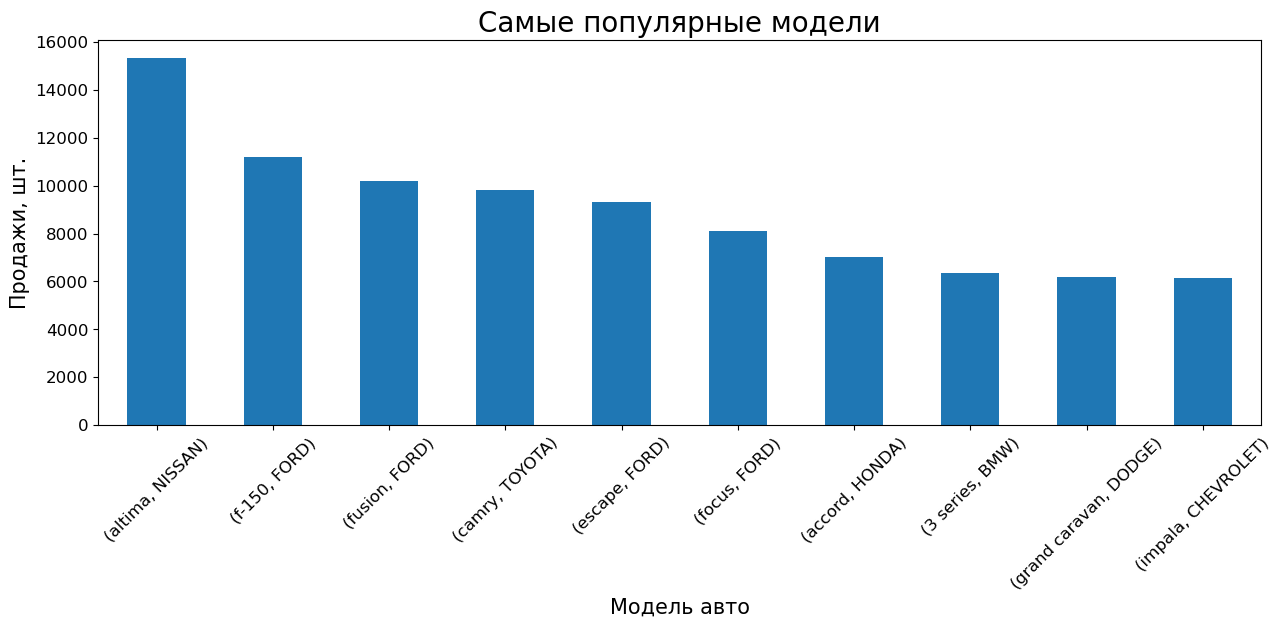

In [32]:
top_model.plot(kind='bar', figsize=(15,5),fontsize=12, legend=False)
plt.title("Самые популярные модели",fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Модель авто',fontsize=15)
plt.ylabel('Продажи, шт.',fontsize=15);

**Выводы по разделу:**
- названия всех моделей привели к нижнему регистру
- определили топ 10 моделей и марки, которым они принадлежат. Так в топ 10 оказалось 4 представителя FORD и по одному  Nissan, Toyota, Honda, BMW, Dodge, Chevrolet
- самой продаваемой оказалась модель altima от Nissan с результатом 15318 экземпляров.

#### Модификация (trim).

**Определим топ 10 лучших комплектаций,моделей и марок, к которым они относятся.**

In [33]:
top_trim = data_train.pivot_table(
    index=['trim','model','make'],
    values='sellingprice', 
    aggfunc='count'
).sort_values(by='sellingprice', ascending = False).head(10)
top_trim.columns=['count']
top_trim

count
trim    model            make           
2.5 S   altima           NISSAN     8973
SE      fusion           FORD       6639
        focus            FORD       6221
XLT     f-150            FORD       5129
2.5     altima           NISSAN     5120
LE      camry            TOYOTA     4717
SXT     grand caravan    DODGE      3591
Touring town and country CHRYSLER   3589
GLS     elantra          HYUNDAI    3502
        sonata           HYUNDAI    3461

**Выводы по разделу:**
- самой продаваемой оказалась модификация 2.5s от Nissan altima

#### Тип кузова (body).

**Приведём названия типа кузова к нижнему регистру и посмотрим уникальные значения в столбце.**

In [34]:
data_train['body'] = data_train['body'].str.lower()
data_train['body'].sort_values().unique()

array(['access cab', 'beetle convertible', 'cab plus', 'cab plus 4',
       'club cab', 'convertible', 'coupe', 'crew cab', 'crewmax cab',
       'cts coupe', 'cts wagon', 'cts-v coupe', 'cts-v wagon',
       'double cab', 'e-series van', 'elantra coupe', 'extended cab',
       'g convertible', 'g coupe', 'g sedan', 'g37 convertible',
       'g37 coupe', 'genesis coupe', 'granturismo convertible',
       'hatchback', 'king cab', 'koup', 'mega cab', 'minivan',
       'promaster cargo van', 'q60 convertible', 'q60 coupe', 'quad cab',
       'ram van', 'regular cab', 'regular-cab', 'sedan', 'supercab',
       'supercrew', 'suv', 'transit van', 'tsx sport wagon', 'van',
       'wagon', 'xtracab'], dtype=object)

**Определим топ 5 самых продаваемых типов кузова. Визуализируем данные.**

In [35]:
top_body = data_train.pivot_table(
    index='body', 
    values='sellingprice', 
    aggfunc='count'
).sort_values(by='sellingprice', ascending = False).head()
top_body.columns=['count']
top_body

,count
body,
sedan,187283
suv,110514
hatchback,20349
minivan,19596
coupe,13506


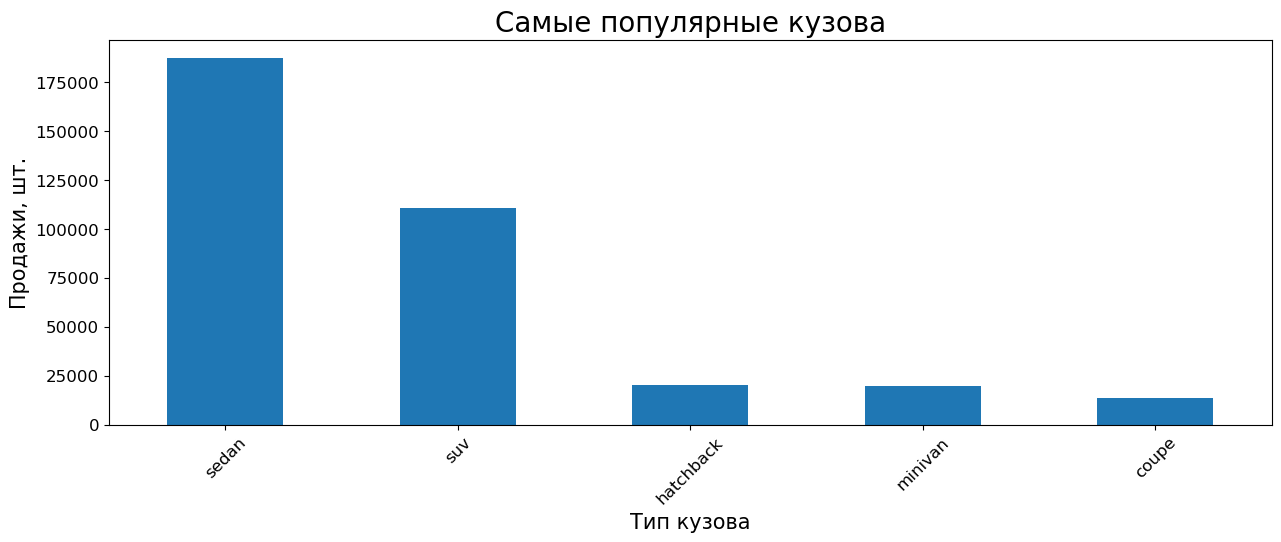

In [36]:
top_body.plot(kind='bar', figsize=(15,5),fontsize=12, legend=False)
plt.title("Cамые популярные кузова",fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Тип кузова',fontsize=15)
plt.ylabel('Продажи, шт.',fontsize=15);

**Выводы по разделу:**
- самым продаваемым ожидаемо является тип кузова седан
- в топ 3 входят хетчбэк и внедорожник

#### Состояние(condition).

**Проверим столбец с состоянием авто на наличие выбросов и аномалий при помощи диаграммы размаха**

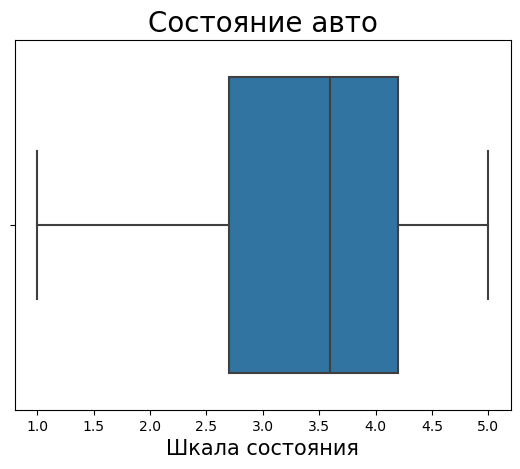

In [37]:
sns.boxplot(x=data_train['condition'])
plt.title('Состояние авто',fontsize=20)
plt.xlabel('Шкала состояния',fontsize=15);

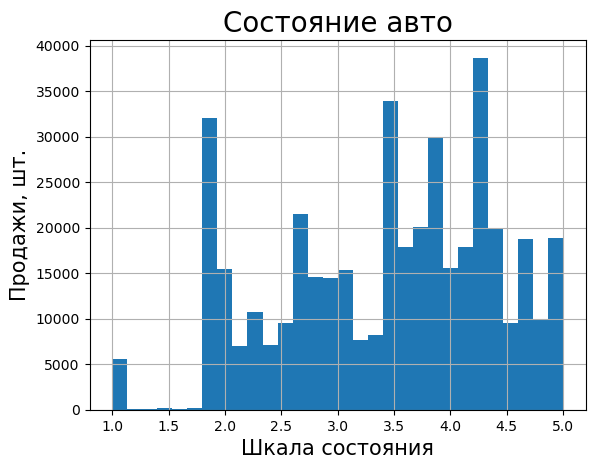

In [38]:
data_train['condition'].hist(bins=30)
plt.title('Состояние авто',fontsize=20)
plt.ylabel('Продажи, шт.',fontsize=15)
plt.xlabel('Шкала состояния',fontsize=15);

**Выводы по разделу:**
- аномалий не обнаружено
- больше всего наблюдений наблюдается в районе состояния 3.5 

#### Пробег(odometer).

**Проверим столбец с пробегом авто на наличие выбросов и аномалий при помощи диаграммы размаха**

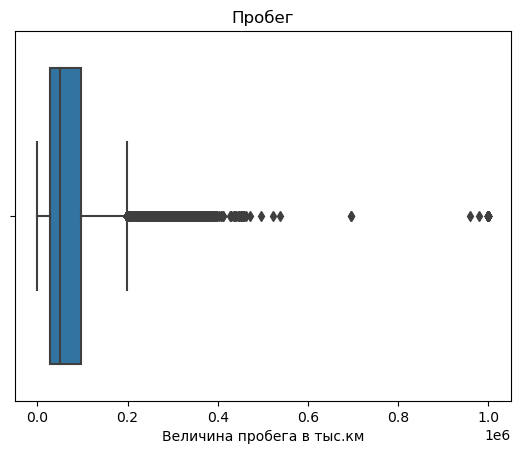

In [39]:
sns.boxplot(x=data_train['odometer'])
plt.title('Пробег')
plt.xlabel('Величина пробега в тыс.км');

**Посмотрим на количество самых популярных пробегов.**

In [40]:
data_train['odometer'].value_counts()

1.0         914
999999.0     50
10.0         23
21587.0      17
21310.0      17
           ... 
63609.0       1
27040.0       1
201778.0      1
133146.0      1
174269.0      1
Name: odometer, Length: 153906, dtype: int64

**Слишком много наблюдений с пробегом в 1 и 999999 км. Будем считать данные значения выбросами.Ограничимся этими значениями,не включив их.** 

In [41]:
data_train = data_train[data_train['odometer']<999999]
data_train = data_train[data_train['odometer']>1]
data_train.reset_index(drop=True,inplace=True)
data_train

,year,make,model,trim,body,condition,odometer,sellingprice,country,region
0,2011,FORD,edge,SEL,suv,4.2,111041.0,12500,Canada,North America
1,2014,FORD,fusion,SE,sedan,3.5,31034.0,14500,Mexico,North America
2,2012,NISSAN,sentra,2.0 SL,sedan,2.2,35619.0,9100,Mexico,North America
3,2003,HUMMER,h2,Base,suv,2.8,131301.0,13300,United States,North America
4,2007,FORD,fusion,SEL,sedan,2.0,127709.0,1300,Mexico,North America
...,...,...,...,...,...,...,...,...,...,...
419923,2013,KIA,optima,EX Hybrid,sedan,4.5,20434.0,16000,South Korea,Asia
419924,2014,MINI,cooper countryman,S ALL4,wagon,2.9,14675.0,24250,Germany,Europe
419925,2008,BMW,6 series,650i,coupe,3.7,102552.0,16750,Germany,Europe
419926,2014,DODGE,2500,SLT,crew cab,3.0,29367.0,33000,Mexico,North America


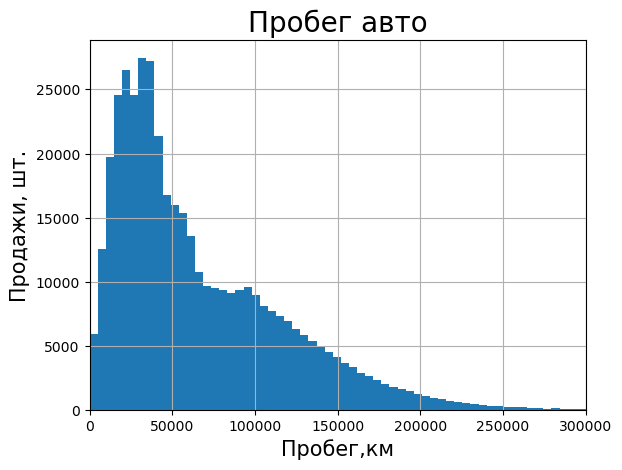

In [42]:
data_train['odometer'].hist(bins=200)
plt.title('Пробег авто',fontsize=20)
plt.ylabel('Продажи, шт.',fontsize=15)
plt.xlabel('Пробег,км',fontsize=15)
plt.xlim(0,300000);

**Выводы по разделу:**
- удалили аномалии, ограничив диапазон пробегов от 1 до 999999, не включив данные значения.
- самый популярный пробег проглядывается в районе 40000 км.

#### Страна производства(country).

**Выведем уникальные значения.**

In [43]:
data_train['country'].sort_values().unique()

array(['Australia', 'Brazil', 'Canada', 'Finland', 'France', 'Germany',
       'Hungary', 'Italy', 'Japan', 'Mexico', 'South Korea', 'Sweden',
       'Thailand', 'Turkey', 'United Kingdom', 'United States'],
      dtype=object)

**Определим топ стран-производителей и визуализируем результат.**

In [44]:
top_country = data_train.pivot_table(
    index='country', 
    values='sellingprice', 
    aggfunc='count'
).sort_values(by='sellingprice', ascending = False).head()
top_country.columns=['count']
top_country

,count
country,
United States,217645
Canada,54371
Japan,48180
Mexico,39378
Germany,34883


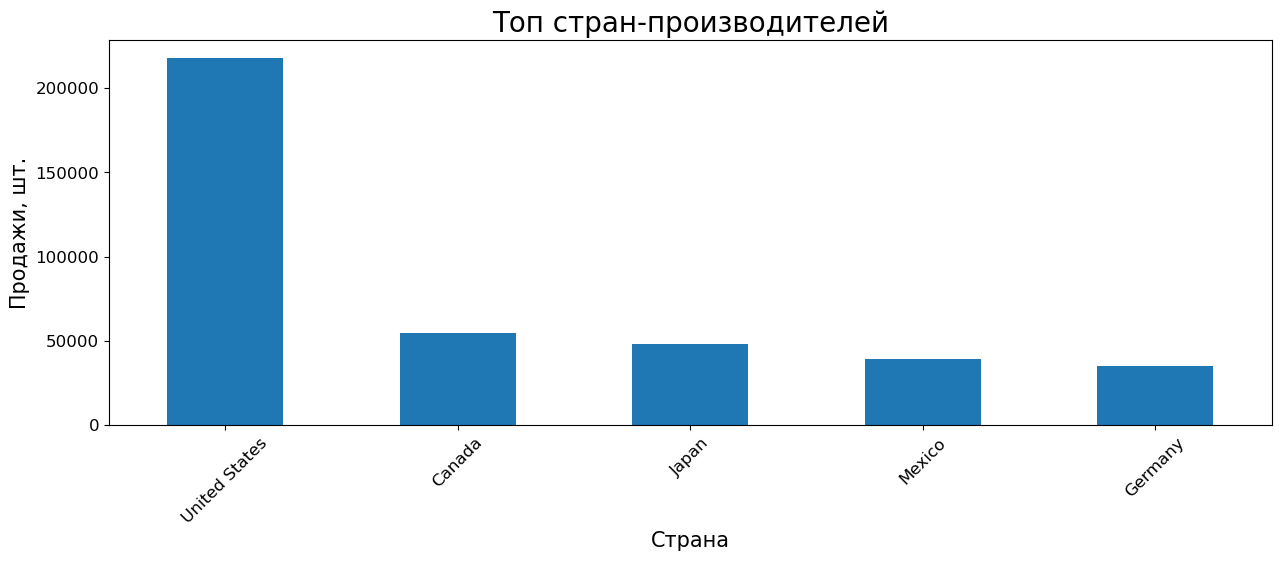

In [45]:
top_country.plot(kind='bar', figsize=(15,5),fontsize=12, legend=False)
plt.title("Топ стран-производителей",fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Страна',fontsize=15)
plt.ylabel('Продажи, шт.',fontsize=15);

**Выводы по разделу:**
- Определили топ 5 стран-производителей.
- Первое место ожидаемо США,так как датасет учитывает продажи в этой стране.

#### Часть света (region).

**Выведем уникальные значения.**

In [46]:
data_train['region'].sort_values().unique()

array(['Asia', 'Europe', 'North America', 'Oceania', 'South America'],
      dtype=object)

**Определим топ частей света по производству.**

In [47]:
top_region = data_train.pivot_table(
    index='region', 
    values='sellingprice', 
    aggfunc='count'
).sort_values(by='sellingprice', ascending = False).head()
top_region.columns=['count']
top_region

,count
region,
North America,311394
Asia,67082
Europe,41212
Oceania,162
South America,78


**Выведем полученную таблицу на график.**

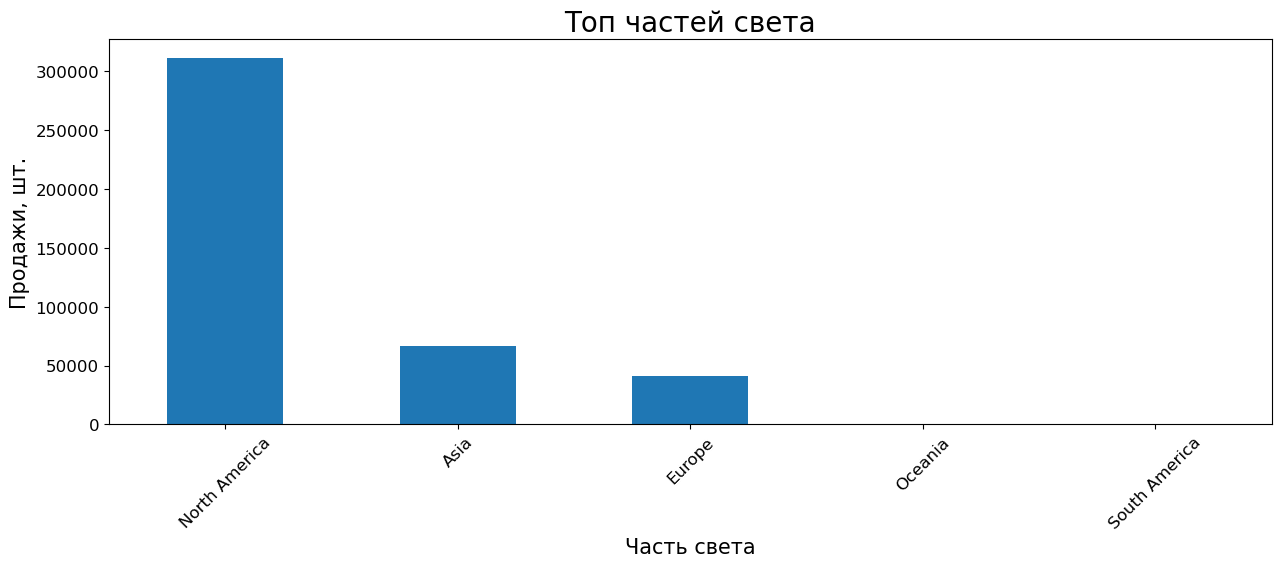

In [48]:
top_region.plot(kind='bar', figsize=(15,5),fontsize=12, legend=False)
plt.title("Топ частей света",fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Часть света',fontsize=15)
plt.ylabel('Продажи, шт.',fontsize=15);

**Выводы по разделу:**
- Северная Америка заняла первое место с огромным отрывом. Далее расположились Азия, Европа, Океания и Южная Америка.

### Выводы по пункту:
- добавили 2 новых синтетических признака: страну производства(country) и часть света(region).
- удалили строки с пропусками и заполнили пропуски в столбце с моделью(model)
- удалили дубликаты.Их было 7 шт.
- по каждому признаку вывели топы по категориям и выполнили предобработку по необходимости. Как пример, удалили аномалии в столбце с пробегом(odometer).

## Подготовка к обучению модели.

### Корреляция признаков (зависимость).

**Для того, чтобы посмотреть на зависимость признаков друг от друга, нужно создать тепловую карту (heatmap) на основе корреляционной матрицы данных. Но мы не можем сразу построить корреляционную матрицу между всеми признаками, так как матрица строится только между числовыми данными, а у нас есть категориальные. Исходя из этого нужно закодировать категориальные признаки при помощи кодировщика OrdinalEncoder. Он переведет категориальные признаки в числовые.**

In [49]:
encoder = OrdinalEncoder()

**Все категориальные признаки помещаем в список и передаем  данный список при обучении кодировщика.**

In [50]:
columns_to_encode = ['make','model','body','trim','country','region']
encoder.fit(data_train[columns_to_encode])

OrdinalEncoder()

**Создадим новый датафрейм для визуализации корреляции при помощи копирования. Старый нам еще потребуется в привычной форме.**

In [51]:
data_train_oe = data_train.copy()

**Закодируем категориальные признаки тренировочной выборки.**

In [52]:
data_train_oe[columns_to_encode] = encoder.fit_transform(data_train_oe[columns_to_encode])

**Создадим матрицу корреляции,присвоив ей переменную corr_matrix.**

In [53]:
corr_matrix = data_train_oe.corr()

**Передадим матрицу в аргумент тепловой карты и посмотрим на созданную тепловую карту.**

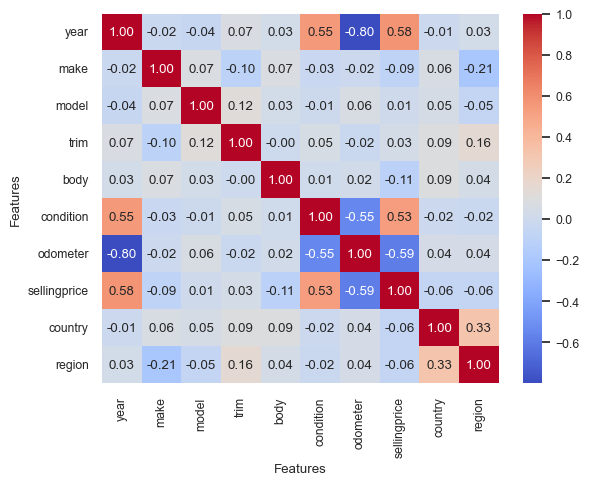

In [54]:
sns.set(font_scale=0.8)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='.2f')

plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

### Разделение на выборки и кодирование.

**Отделим целевой признак (sellingprice) от остальных признаков как для исходных данных, так и для закодированных.**

In [55]:
features_train = data_train.drop(['sellingprice'],axis= 1)
target_train = data_train['sellingprice']

features_train.shape[0]

419928

In [56]:
features_train_oe = data_train_oe.drop(['sellingprice'],axis= 1)
target_train_oe = data_train_oe['sellingprice']

features_train_oe.shape[0]

419928

**Проверим всю информацию для обычной и закодированной выборки**

In [57]:
features_train_oe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419928 entries, 0 to 419927
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       419928 non-null  int64  
 1   make       419928 non-null  float64
 2   model      419928 non-null  float64
 3   trim       419928 non-null  float64
 4   body       419928 non-null  float64
 5   condition  419928 non-null  float64
 6   odometer   419928 non-null  float64
 7   country    419928 non-null  float64
 8   region     419928 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 28.8 MB


In [58]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419928 entries, 0 to 419927
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       419928 non-null  int64  
 1   make       419928 non-null  object 
 2   model      419928 non-null  object 
 3   trim       419928 non-null  object 
 4   body       419928 non-null  object 
 5   condition  419928 non-null  float64
 6   odometer   419928 non-null  float64
 7   country    419928 non-null  object 
 8   region     419928 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 28.8+ MB


**Выводы по разделу:**
- при помощи тепловой карты,на которой отображена зависимость признаков друг от друга, убедились в том, что сильной корреляции между признаками нет. Проблем с мультиколлинеарностью быть не должно.
- разделили исходные и кодированные данные на признаки(все столбцы кроме sellingprice) и целевой признак(столбец sellingprice)

## Обучение модели

**Применим к нашим данным несколько моделей машинного обучения и выберем ту, которая покажет наиболее низкий результат mape. Чем mape ниже, тем точнее модель. Рассмотрим две популярные модели:**

- Решающее дерево.
- CatBoostRegressor.

### Решающее дерево(DecisionTreeRegressor).

**Для определения метрики при помощи модели решающего дерева используем кросс-валидацию равную 5.Передадим закодированные данные на обучение модели.Псевдослучайность зафиксируем random_state=12345**

In [59]:
%%time

model = DecisionTreeRegressor(random_state=12345)
model.fit(features_train_oe, target_train)
mape = cross_val_score(model, features_train_oe, target_train, cv=5, scoring='neg_mean_absolute_percentage_error').mean()
print('Лучшее MAPE для решающего дерева:', -mape)

Лучшее MAPE для решающего дерева: 0.19951646699751485
Wall time: 29.4 s


**Решающее дерево показало неплохой результат искомой метрики равный 19,9%. Именно на столько ошибается модель, когда предсказывает стоимость авто.**

### CatboostRegressor.

**Для поиска гиперпараметров  воспользуемся GridSearchCV().На вход передадим модель, её гиперпараметры, кросс-валидацию(cv) равную 5 и вычислим необходимую метрику. Для предсказаний воспользуемся инструментом Pipeline, который позволяет объединить несколько операций обработки данных в единую модель. В нашем случае объединим модель машинного обученияCatBoostRegressor() и метод стандартизации(приведение к одному масштабу) StandardScaler().**

In [60]:
%%time

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', CatBoostRegressor())
])
parameters = {
    'model__learning_rate': [0.01, 0.1],
    'model__depth': [6, 8]
}
grid_cat = GridSearchCV(estimator=pipe, param_grid=parameters, cv=5, scoring='neg_mean_absolute_percentage_error')
grid_cat.fit(features_train_oe, target_train)
print('Лучшее MAPE для CatBostRegressor:', -grid_cat.best_score_, 'с гиперпараметрами:', grid_cat.best_params_)

0:	learn: 9674.5869815	total: 263ms	remaining: 4m 22s
1:	learn: 9624.5239363	total: 337ms	remaining: 2m 48s
2:	learn: 9576.3110713	total: 404ms	remaining: 2m 14s
3:	learn: 9528.0856235	total: 474ms	remaining: 1m 58s
4:	learn: 9480.3226613	total: 544ms	remaining: 1m 48s
5:	learn: 9433.8546415	total: 614ms	remaining: 1m 41s
6:	learn: 9387.4115330	total: 685ms	remaining: 1m 37s
7:	learn: 9342.2051601	total: 754ms	remaining: 1m 33s
8:	learn: 9297.5793653	total: 820ms	remaining: 1m 30s
9:	learn: 9252.7397832	total: 883ms	remaining: 1m 27s
10:	learn: 9209.2067130	total: 947ms	remaining: 1m 25s
11:	learn: 9166.1035000	total: 1.01s	remaining: 1m 23s
12:	learn: 9123.2583421	total: 1.08s	remaining: 1m 22s
13:	learn: 9081.7671945	total: 1.15s	remaining: 1m 20s
14:	learn: 9040.8788856	total: 1.22s	remaining: 1m 19s
15:	learn: 9000.6249650	total: 1.28s	remaining: 1m 18s
16:	learn: 8959.8804786	total: 1.35s	remaining: 1m 17s
17:	learn: 8920.5203086	total: 1.42s	remaining: 1m 17s
18:	learn: 8882.9106

**Отличный результат показала модель градиентного бустинга CatBoost-15,5%. Данную модель рекомендую к использованию!**

## Определение важности признаков.

**Получим важность признаков. Уже обученную модель достанем из атрибута best_estimator_ объекта grid_cat.**

In [61]:
feature_importance = grid_cat.best_estimator_.named_steps['model'].feature_importances_

**Создадим датафрейм с важность признаков и отсортируем его по убыванию важности**

In [62]:
importance_data = pd.DataFrame({"Признаки": features_train.columns, "Важность": feature_importance})
importance_data = importance_data.sort_values(by="Важность", ascending=False)
importance_data

,Признаки,Важность
4,body,18.283712
1,make,16.280656
2,model,13.698206
0,year,12.396351
3,trim,11.869518
6,odometer,9.426553
7,country,9.113494
8,region,5.539985
5,condition,3.391525


**Визуализируем полученный датафрейм**

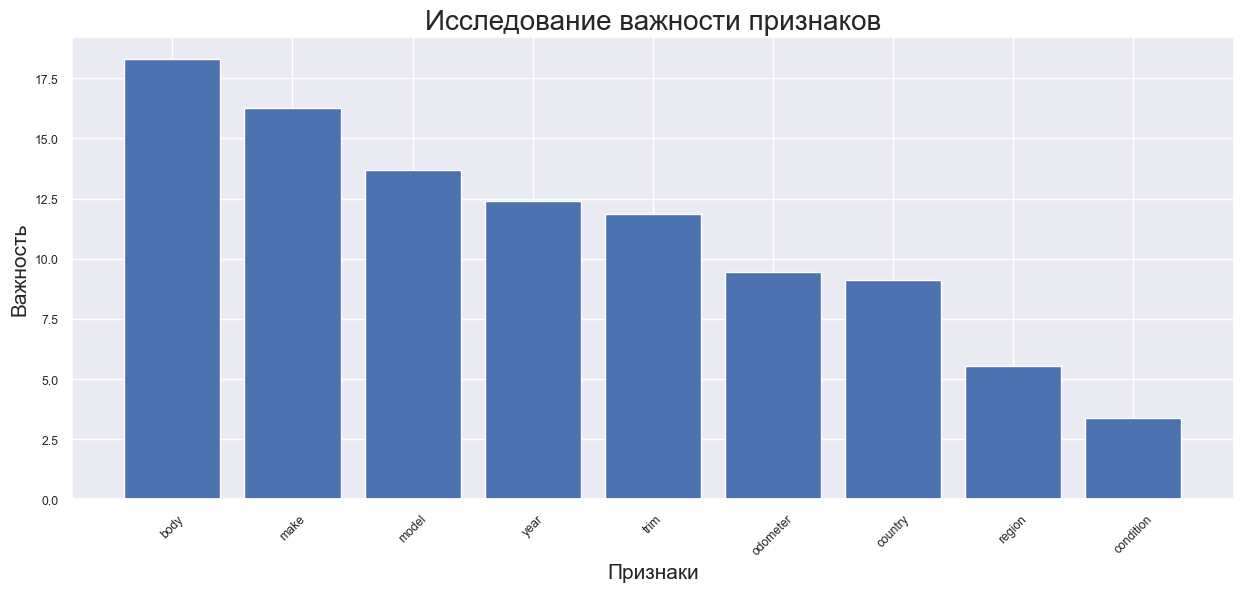

In [63]:
plt.figure(figsize=(15, 6))
plt.bar(importance_data["Признаки"], importance_data["Важность"])
plt.xticks(rotation=45)
plt.xlabel("Признаки",fontsize=15)
plt.ylabel("Важность",fontsize=15)
plt.title("Исследование важности признаков",fontsize=20)
plt.show()

**Выводы по разделу:**
- наиболее важным признаком для модели оказался body, далее идут make, model. Наименее важным является condition.

## Обработка тестовых данных.

### Знакомство с данными.

**Посмотрим основную информацию по тестовому датасету, применив ранее созданную функцию opening**

In [64]:
opening(data_test)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
1,2014,GMC,Savana Cargo,2500,Van,NaN,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST)
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST)
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          107997 non-null  object 
 2   model         107979 non-null  object 
 3   trim          107944 non-null  object 
 4   body          107464 non-null  object 
 5   transmission  97047 non-null   object 
 6   vin           110058 non-null  object 
 7   state         110058 non-null  object 
 8   condition     107679 non-null  float64
 9   odometer      110039 non-null  float64
 10  color         109900 non-null  object 
 11  interior      109900 non-null  object 
 12  seller        110058 non-null  object 
 13  saledate      110058 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 11.8+ MB


None

,year,condition,odometer
count,110058.000000,107679.000000,110039.000000
mean,2010.060005,3.423222,68074.331601
std,3.960190,0.951301,53520.988173
min,1982.000000,1.000000,1.000000
25%,2007.000000,2.700000,28313.500000
50%,2012.000000,3.600000,51922.000000
75%,2013.000000,4.200000,98852.500000
max,2015.000000,5.000000,999999.000000


year                0
make             2061
model            2079
trim             2114
body             2594
transmission    13011
vin                 0
state               0
condition        2379
odometer           19
color             158
interior          158
seller              0
saledate            0
dtype: int64

**Главной задачей проекта является создание таблицы, состоящей из двух столбцов vin из тестовой выборки и предсказания(predictions_test), которые мы должны получить из тестовых данных, применив к ним ранее обученную модель на тренировочных данных. Отделим сразу столбец с vin-ом в отдельную переменную data_test_vin, к которой потом добавим предсказания.**

In [65]:
data_test_vin = data_test['vin']

**Но прежде, чем получить предсказания, нам нужно обработать пропуски в тестовых данных аналогичным алгоритмом, что мы использовали при удалении пропусков в тренировочной выборке.**

### Добавление новых синтетических  и удаление неинформативных признаков.

**Добавим признаки со страной(country) и материком(region)**

In [66]:
for i, vin_code in enumerate(data_test['vin']):
    vin = Vin(vin_code)
    data_test.loc[i, 'country'] = vin.country
    data_test.loc[i,'region'] = vin.region

**Удалим неинформативные признаки + vin**

In [67]:
data_test = data_test.drop(columns=['saledate','seller','state','vin','transmission','color','interior'],axis=1)

### Работа с пропусками.

**Единственное отличие между тренировочной и тестовой выборками при заполнении пропусков состоит в том, что из тестовой нельзя удалять строки, в которых встречаются пропущенные значения. В таком случае нужно заполнить пропуски какими то значениями. Пропуски в столбцах с категориальными переменными, такие как make,body,trim и model,заполним модой. В столбцах с вещественными переменнными, такие как condition и odometer,пропуски заполним медианой. Важно понимать, что моду и медиану мы должны рассчитывать по данным тренировочной выборки и подставлять на место пропусков в тестовую.**

In [68]:
data_test['make'] = data_train['make'].fillna(value=data_train['make'].mode()[0])
data_test['body'] = data_train['body'].fillna(value=data_train['body'].mode()[0])
data_test['trim'] = data_train['trim'].fillna(value=data_train['trim'].mode()[0])
data_test['condition'] = data_train['condition'].fillna(value=data_train['condition'].median())
data_test['odometer'] = data_train['odometer'].fillna(value=data_train['odometer'].median())

In [69]:
for b in data_test.loc[data_test['model'].isna(),'make'].unique():
    data_test.loc[data_test['model'].isna(),'model'] = data_train.loc[data_train['make']==b,'model'].mode()[0]

**Проверим тестовую на наличие пропусков.**

In [70]:
data_test.isna().sum()

year         0
make         0
model        0
trim         0
body         0
condition    0
odometer     0
country      0
region       0
dtype: int64

### Кодирование.

**Создаём копию тестовой выборки для кодирования признаков**

In [71]:
data_test_oe = data_test.copy()
data_test_oe

,year,make,model,trim,body,condition,odometer,country,region
0,2005,FORD,CTS,SEL,suv,4.2,111041.0,United States,North America
1,2014,FORD,Savana Cargo,SE,sedan,3.5,31034.0,United States,North America
2,2013,NISSAN,Murano,2.0 SL,sedan,2.2,35619.0,Japan,Asia
3,2013,HUMMER,Impala,Base,suv,2.8,131301.0,Canada,North America
4,2013,FORD,Titan,SEL,sedan,2.0,127709.0,United States,North America
...,...,...,...,...,...,...,...,...,...
110053,2011,MAZDA,Wrangler,s Sport,sedan,1.9,95398.0,United States,North America
110054,2014,JEEP,IS 250,Laredo,suv,1.9,105992.0,Japan,Asia
110055,2004,JEEP,Maxima,Sport,suv,2.0,132771.0,United States,North America
110056,2013,NISSAN,370Z,LE,suv,2.7,174984.0,Japan,Asia


**Закодируем категориальные признаки в тестовой выборке, использовав ранее созданный на тренировочных данных кодировщик encoder**

In [72]:
data_test_oe[columns_to_encode] = encoder.fit_transform(data_test_oe[columns_to_encode])

**Взглянем на закодированную тестовую выборку**

In [73]:
data_test_oe

,year,make,model,trim,body,condition,odometer,country,region
0,2005,13.0,114.0,908.0,38.0,4.2,111041.0,15.0,2.0
1,2014,13.0,557.0,887.0,35.0,3.5,31034.0,15.0,2.0
2,2013,34.0,425.0,49.0,35.0,2.2,35619.0,8.0,0.0
3,2013,17.0,327.0,337.0,38.0,2.8,131301.0,2.0,2.0
4,2013,13.0,618.0,908.0,35.0,2.0,127709.0,15.0,2.0
...,...,...,...,...,...,...,...,...,...
110053,2011,29.0,662.0,1266.0,35.0,1.9,95398.0,15.0,2.0
110054,2014,22.0,321.0,718.0,38.0,1.9,105992.0,8.0,0.0
110055,2004,22.0,403.0,1013.0,38.0,2.0,132771.0,15.0,2.0
110056,2013,34.0,21.0,661.0,38.0,2.7,174984.0,8.0,0.0


### Получение предсказаний.

**Получим предсказания тестовых данных, применив к ним ранее обученную модель CatboosRegressor()**

In [74]:
predictions_test = grid_cat.predict(data_test_oe)

**Посморим на ранее созданную таблицу с отделенными ВИНами тестовых данных**

In [75]:
data_test_vin.head()

0    1g6dp567450124779
1    1gtw7fca7e1902207
2    jn8az1mw6dw303497
3    2g1wf5e34d1160703
4    1n6aa0ec3dn301209
Name: vin, dtype: object

**Сформируем таблицу с вином и предсказаниями на тестовых данных**

In [76]:
data_test = data_test.reset_index()
submission_test = pd.DataFrame({
    'vin': data_test_vin, 
    'sellingprice': predictions_test
})

**Посмотрим на итоговую таблицу**

In [77]:
submission_test

,vin,sellingprice
0,1g6dp567450124779,10269.857557
1,1gtw7fca7e1902207,22311.790050
2,jn8az1mw6dw303497,12471.628305
3,2g1wf5e34d1160703,19146.352399
4,1n6aa0ec3dn301209,14759.011861
...,...,...
110053,1j4aa2d17bl584330,11303.527536
110054,jthbf1d23e5007526,25359.323611
110055,1n4ba41e54c831950,2760.453796
110056,jn1az4eh3dm382431,27279.810797


**Сохраним её в файл**

In [78]:
submission_test.to_csv('submission_test.csv', index=False)

## Отчёт.

Перед нами состояла задача разработать модель предсказания стоимости автомобиля на вторичном рынке.

Для оптимизации и быстрой навигации по проекту был составлен план, который пошагово описывал весь процесс решения задачи. Было решено действовать чётко по плану, без каких-либо отклонений. И нам это удалось. Мы реализовали все пункты, которые отметили для себя в начале проекта.

Исходные данные проекта состояли из двух датафреймов-тренировочной и тестовой выборок,которые содержали данные в соотношении 3:1. Данные выборки нуждались в предобработке. В **9 из 15 столбцов** в каждой выборке были **обнаружены пропуски** значений, в некоторых были **аномалии**. В тренировочной выборке в столбцах make(бренд авто), model(модель), trim(комплектация) и body(тип кузова) были **пропуски в одних и тех же наблюдениях**. Мы удалили пропуски в том,у которого в числовом выражении **больше всех пропусков**, в нашем случае это был столбец body. Так же удалили пропуски в столбцах condition(состояние авто) и odometer(пробег авто на момент продажи). Количество строк с пропусками в данных столбцах составлял чуть больше 2,2%. Данным количеством можно было пожертвовать для сохранения "реальности" данных.В столбце с пробегом было решено **ограничить показатели в диапазоне от 1 до 999999 км, не включая крайние значения**. 7 явных дубликатор из тренирвочной тоже удалили. Так же в тренировочной выборке были обнаружены неявные дубликаты, обработали их. В целом провели EDA анализ по каждому признаку отдельно:привели уникальные значения к верхнему и нижнему регистру для удобства, визуализировали распределение значений,выявили топы в каждом столбце.

После предобработки тренировочного датафрейма после сброса индекса в таблице остались **9 столбцов-признаков и 1 столбец-целевой признак**. Вот полный список столбцов-признаков: year,make,model,trim,body,condition,odometer,country,region,sellingprice(целевой признак).

Для обучения моделей категориальные признаки нужно было **закодировать**. Мы воспользовалтсь кодировщиком **OrdinalEncoder**.
При помощи тепловой карты,на которой отображена зависимость признаков друг от друга, убедились в том, что сильной корреляции между признаками нет. Проблему **мультиколлинеарности исключили**.

Для получения метрики качества MAPE я выбрал 2 модели для сравнения:

- Дерево решений;
- CatBoost.

К дереву решений применил кросс-валидацию(cv=5). Псевдослучайность зафиксировал random_state=12345. К модели градиентного бустинга Catboost применил автоподбор гиперпараметров с помощью GridSearchCV.
**Лучшей моделью стала модель градиентного бустинга CatBoost c результатом MAPE-0.15** на обучающем наборе данных. Дерево решений показало результат 0.19. Гиперпараметры, которые подобрал GridSearchCV были следующие: **model__depth=8, model__learning_rate=0.1.**

После обучения модели и получения метрики на тренировочных данных было проведено исследование важности признаков. **Самым "важным"** для нашей модели оказался признак **body**,далее идут make, model. Наименее важным является condition.

Главной задачей проекта является **создание таблицы**, состоящей из двух столбцов vin из тестовой выборки и предсказания(predictions_test), которые мы должны были получить из тестовых данных, применив к ним ранее обученную модель на тренировочных данных. Для того, чтобы мы могли получить предсказания на тестовых данным, нам нужно было заполнить пропуски в них по алгоритму заполнения пропусков в тренировочных данных. Вот тут возникла проблема. Она состояла в том, что
из **тестовой нельзя удалять строки, в которых встречаются пропущенные значения**. В таком случае нужно было заполнить пропуски какими то значениями. Пропуски в столбцах с категориальными переменными, такие как make,body,trim и model,заполнили модой. В столбцах с вещественными переменнными, такие как condition и odometer,пропуски заполнили медианой. Закодировали так же категориальные признаки в тестовых данных и получили предсказания. Файл с ВИНом и предсказаниями сохранили в отдельную переменную.

Для того, чтобы улучшить качество модели и соответственно уменьшить метрику MAPE могу порекомендовать следующее:
- попробовать различные алгоритмы машинного обучения и выбрать наиболее подходящий для нашей задачи;
- больше экспериментировать с гиперпараметрами модели, чтобы найти оптимальные значения;
- уделить внимание разработке новых признаков, имеющих большое влияние на качество модели.